<a href="https://colab.research.google.com/github/Snehadas2004/Ai-Ml.project/blob/main/AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset (adjust encoding if necessary)
df = pd.read_csv('student_prediction.csv', encoding='utf-8')

# Display the first few rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head())

# Display info about data types and non-null counts
print("\nDataFrame Info:")
df.info()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


First 5 rows of the dataset:
  Student_ID  Student_Age     Sex High_School_Type Scholarship A6itional_Work  \
0   STUDENT1           20    Male            Other         50%            Yes   
1   STUDENT2           20    Male            Other         50%            Yes   
2   STUDENT3           20    Male            State         50%             No   
3   STUDENT4           18  Female          Private         50%            Yes   
4   STUDENT5           20    Male          Private         50%             No   

  Sports_activity Transportation  Weekly_Study_Hours Attendance Reading Notes  \
0              No        Private                   0     Always     Yes   Yes   
1              No        Private                   0     Always     Yes    No   
2              No        Private                   2      Never      No    No   
3              No            Bus                   2     Always      No   Yes   
4              No            Bus                  12     Always     Yes    No  

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work']

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str).fillna('Missing'))
    else:
        print(f"Column '{col}' not found in DataFrame.")

print(df.head())


Column 'Additional_Work' not found in DataFrame.
  Student_ID  Student_Age  Sex  High_School_Type  Scholarship A6itional_Work  \
0   STUDENT1           20    1                 0            3            Yes   
1   STUDENT2           20    1                 0            3            Yes   
2   STUDENT3           20    1                 2            3             No   
3   STUDENT4           18    0                 1            3            Yes   
4   STUDENT5           20    1                 1            3             No   

  Sports_activity Transportation  Weekly_Study_Hours Attendance Reading Notes  \
0              No        Private                   0     Always     Yes   Yes   
1              No        Private                   0     Always     Yes    No   
2              No        Private                   2      Never      No    No   
3              No            Bus                   2     Always      No   Yes   
4              No            Bus                  12     Always  

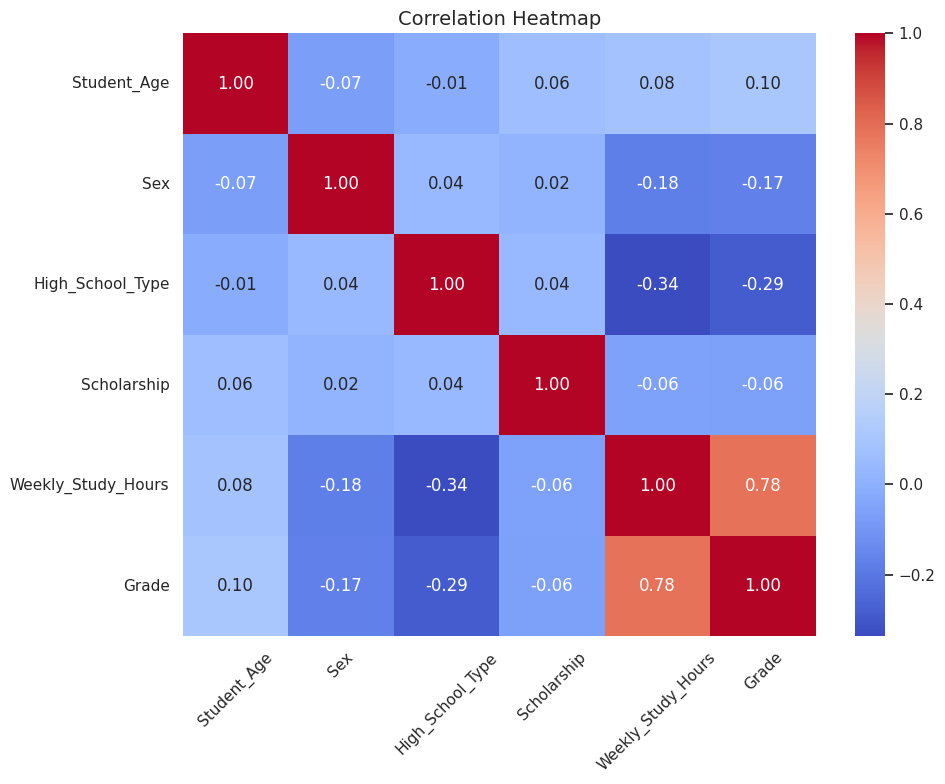

Column 'Final_Result' not found in the DataFrame.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Distribution of the target variable
# 👉 Replace this with your actual target column name
target_col = 'Final_Result'  # Change this if your target column is different

if target_col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[target_col], kde=True, bins=20)
    plt.title(f"Distribution of Target Column: {target_col}", fontsize=14)
    plt.xlabel("Target")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # 3. Class balance (if it's a classification problem)
    print("Class Distribution:")
    print(df[target_col].value_counts())
else:
    print(f"Column '{target_col}' not found in the DataFrame.")


In [ ]:
from sklearn.model_selection import train_test_split

# 1. Drop 'Student_ID' column if present
if 'Student_ID' in df.columns:
    df.drop('Student_ID', axis=1, inplace=True)
    print("Dropped 'Student_ID' column.")

# 2. Set up features and target
target_col = 'Final_Result'  # Change this if your target column is different

if target_col in df.columns:
    X = df.drop(target_col, axis=1)  # Features
    y = df[target_col]               # Target

    # 3. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Show the shapes of datasets
    print("\n✅ Data split successful:")
    print("Training set size:", X_train.shape)
    print("Testing set size:", X_test.shape)
else:
    print(f"❌ Target column '{target_col}' not found in the DataFrame.")


❌ Target column 'Final_Result' not found in the DataFrame.


In [ ]:
print(df.columns.tolist())

['Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'A6itional_Work', 'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']


In [ ]:
target_col = 'Final_Result'

In [ ]:
print(df.columns)

Index(['Student_Age', 'Sex', 'High_School_Type', 'Scholarship',
       'A6itional_Work', 'Sports_activity', 'Transportation',
       'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
       'Listening_in_Class', 'Project_work', 'Grade'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(target_col, axis=1)
y = df[target_col]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
target_col = 'Grade'

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(target_col, axis=1)
y = df[target_col]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

In [ ]:
x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)

print("Encoding done successfully!")

Encoding done successfully!


In [ ]:
from sklearn.model_selection import train_test_split

if target_col in df.columns:
    X = df.drop(target_col, axis=1)  # Features
    y = df[target_col]               # Target

    # 3. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Show the shapes of datasets
    print("\n✅ Data split successful:")
    print("Training set size:", X_train.shape)
    print("Testing set size:", X_test.shape)
else:
    print(f"❌ Target column '{target_col}' not found in the DataFrame.")


✅ Data split successful:
Training set size: (516, 13)
Testing set size: (129, 13)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [ ]:
x_train_encoded = preprocessor.fit_transform(x_train)
y_train = y_train  # This stays from train_test_split

In [ ]:
from scipy.sparse import issparse

if issparse(x_train_encoded):
    print("Sparse matrix detected")
    print((x_train_encoded.data != x_train_encoded.data).sum())  # NaN check
else:
    print(np.isnan(x_train_encoded).sum())

Sparse matrix detected
0


In [ ]:
print(y_train.isnull().sum())

0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of training and testing sets
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Label encode all object (categorical) columns
label_encoders = {}

for col in X_train.columns:
    if X_train[col].dtype == "object":
        le = LabelEncoder()
        X_train_encoded[col] = le.fit_transform(X_train[col].astype(str))

        # Transform test set using same encoder
        # Handle unseen labels by mapping manually
        X_test_encoded[col] = X_test[col].astype(str).map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

        # Store the encoder
        label_encoders[col] = le

# Show a preview of encoded data
print("\n✅ Preview of Encoded Training Data:")
print(X_train_encoded.head())



✅ Preview of Encoded Training Data:
     Student_Age  Sex  High_School_Type  Scholarship  A6itional_Work  \
515           21    0                 0            4               1   
29            20    1                 0            4               0   
274           20    0                 0            3               1   
576           19    1                 1            3               1   
434           19    1                 0            1               1   

     Sports_activity  Transportation  Weekly_Study_Hours  Attendance  Reading  \
515                1               0                  30           1        1   
29                 0               1                   0           2        0   
274                0               0                  22           3        1   
576                0               1                  18           3        0   
434                1               1                  30           1        1   

     Notes  Listening_in_Class  Project_wor

In [ ]:
import pandas as pd
df = pd.read_csv("student_prediction.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Set your actual target column name
target_col = 'Grade'

# 1. Define features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# 4. Encode categorical features using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# 5. Transform the data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

print("Encoding done successfully!")

Encoding done successfully!


In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train_encoded, y_train)
print("Model training completed successfully!")

Model training completed successfully!


In [ ]:
y_pred = model.predict(x_test_encoded)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.2806795697674418
R2 Score: 0.8007272134422849


In [ ]:
import pandas as pd
data = pd.read_csv("/content/student_prediction.csv")

In [ ]:
x = data.drop("Grade", axis=1)
y = data["Grade"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split the data
x = df.drop("Grade", axis=1)
y = df["Grade"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Categorical columns
categorical_cols = x.select_dtypes(include=["object"]).columns.tolist()

# One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

# Transform training and testing data
x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_encoded, y_train)
y_pred_dt = dt_model.predict(x_test_encoded)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_encoded, y_train)
y_pred_rf = rf_model.predict(x_test_encoded)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Decision Tree:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R² Score:", r2_score(y_test, y_pred_dt))

print("\nRandom Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

Decision Tree:
MSE: 0.7023643410852713
R² Score: 0.5013456107874126

Random Forest:
MSE: 0.2806795697674418
R² Score: 0.8007272134422849


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train_encoded, y_train)  # lowercase x
y_pred_lr = lr_model.predict(x_test_encoded)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Display the results
print("Linear Regression MSE:", round(mse_lr, 2))
print("Linear Regression R2 Score:", round(r2_lr, 4))


Linear Regression MSE: 1.04
Linear Regression R2 Score: 0.2629


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(x_train_encoded, y_train)
y_pred_dt = dt_model.predict(x_test_encoded)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree MSE:", mse_dt)
print("Decision Tree R2 Score:", r2_dt)

Decision Tree MSE: 0.7376744186046511
Decision Tree R2 Score: 0.47627667703250576


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train_encoded, y_train)
y_pred_rf = rf_model.predict(x_test_encoded)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R2 Score:", r2_rf)

Random Forest MSE: 0.2779547306201549
Random Forest R2 Score: 0.8026617549917511


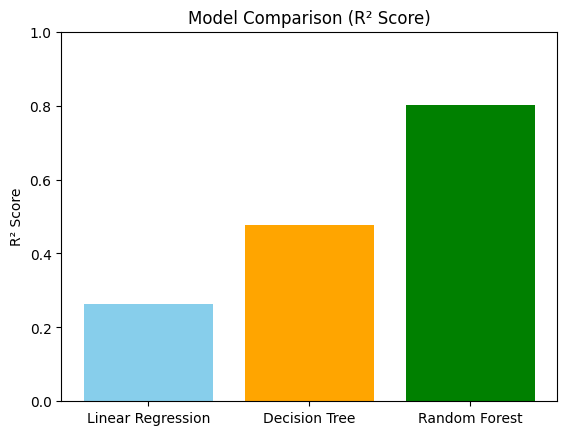

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
scores = [r2_lr, r2_dt, r2_rf]

plt.bar(models, scores, color=['skyblue', 'orange', 'green'])
plt.title('Model Comparison (R² Score)')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.show()